In [79]:
#This code is for analyzing leads by route

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [69]:
#converting csv files

df = pd.read_csv('/home/piny/Documentos/pendrive/PYTHON/dataAnalytics/CompanhiaAerea/archive/customer_booking.csv', encoding='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [70]:
#get dimensions

df.shape

(50000, 14)

In [71]:
#get information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [72]:
#change names

mapper = lambda x: x.title()

df = df.rename(columns=mapper)

df.head()


,Num_Passengers,Sales_Channel,Trip_Type,Purchase_Lead,Length_Of_Stay,Flight_Hour,Flight_Day,Route,Booking_Origin,Wants_Extra_Baggage,Wants_Preferred_Seat,Wants_In_Flight_Meals,Flight_Duration,Booking_Complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [73]:
#remove columns

columns_keep = ['Purchase_Lead', 'Route']
columns_remove = df.columns.difference(columns_keep)
df = df.drop(columns_remove, axis=1)
df.head()

,Purchase_Lead,Route
0,262,AKLDEL
1,112,AKLDEL
2,243,AKLDEL
3,96,AKLDEL
4,68,AKLDEL


In [74]:
#values null

missing_values = df.isnull().sum()
print(missing_values)

Purchase_Lead    0
Route            0
dtype: int64


In [75]:
#to checks duplicates and list sum of each route

sum_leads_by_route = df.groupby('Route')['Purchase_Lead'].sum()

has_duplicate = sum_leads_by_route.index.duplicated()
print("Duplicate: ", has_duplicate.any())

df = sum_leads_by_route
df.head()

Duplicate:  False


Route
AKLDEL    3472
AKLHGH     351
AKLHND     268
AKLICN    5156
AKLKIX     595
Name: Purchase_Lead, dtype: int64

In [76]:
#new table routes and leads

df_table = pd.DataFrame({'Route': df.index, 'Total_Purchase_Lead': df.values})
df_table.head()

,Route,Total_Purchase_Lead
0,AKLDEL,3472
1,AKLHGH,351
2,AKLHND,268
3,AKLICN,5156
4,AKLKIX,595


In [77]:
#best leads by route

df_table = df_table.sort_values(by='Total_Purchase_Lead', ascending=False)
df_table.reset_index(drop=True, inplace=True)
print(df_table.head())

    Route  Total_Purchase_Lead
0  AKLKUL               351720
1  DMKKIX                92969
2  MELSGN                70417
3  DPSICN                70388
4  ICNSIN                68801


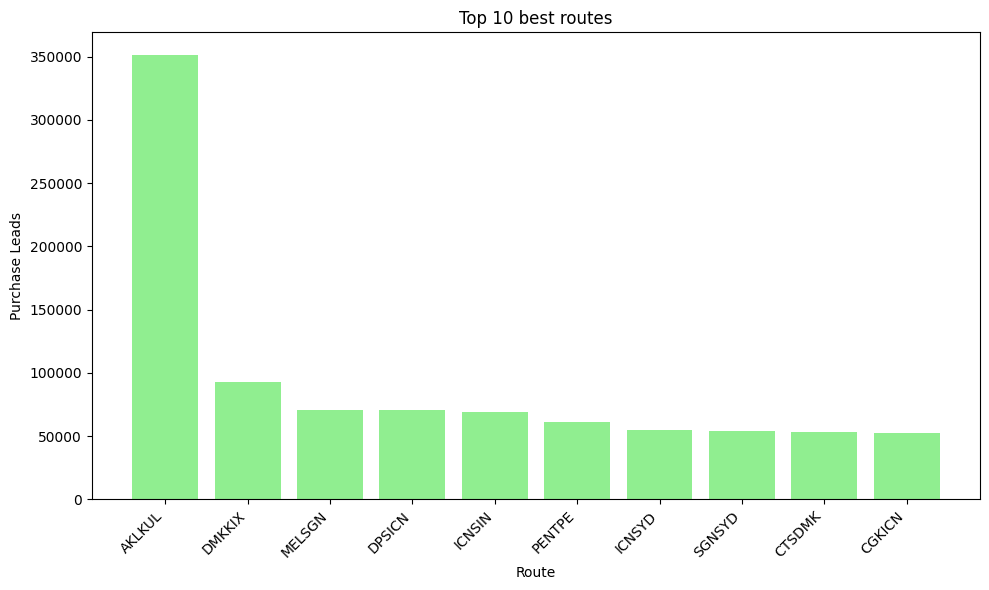

In [78]:
#creanting graphic

N = 10

sorted_leads_by_route = df_table.sort_values(by='Total_Purchase_Lead', ascending=False)

top_routes = sorted_leads_by_route.head(N)

plt.figure(figsize=(10, 6))
plt.bar(top_routes['Route'], top_routes['Total_Purchase_Lead'], color='lightgreen')
plt.xlabel('Route')
plt.ylabel('Purchase Leads')
plt.title('Top {} best routes'.format(N))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()